# IMBD Movie Data 

## Introduction

What kinds of movies tend to do better at the box office?  This project will explore a IMBD movie dataset to see if genre, runtime, or rank has an effect on the amount of money a movie earns over the years.

For this project, we will look at IMBD movie data obtained from Kaggle (https://www.kaggle.com/machinemind/top-rated-movies-in-imdb).  The dataset is also uploaded to the GitHub repository for this project.  This dataset contains movie data for over 6300 movies.  The variables collected in this dataset that will be utilized in this project are the year, runtime, genre, rank, and gross.  This project will explore each of these variables against the gross (or profit) of each movie.

## Literature Review

In a similar analysis, Ben Niu (sources linked at the end of this notebook) found a correlation between some genres (specifically action and adventure) and higher profits, as well as a correlation between some genres and directors.  The scope of Niu's analysis is smaller than the scope in this project (there are about 2,000 movies in Niu's article that were released between 1996-2015, and the IMDB movie dataset contains movies from 1915-2020).

Another study looked at the profit vs the runtime and budget of movies.  In this study, Alan Chen found a positive correlation between a movie's budget and its profit, but there was a low correlation between runtime and profit.  The dataset for this article had a greater scope than the IMDB dataset.  This analysis looked at over 34,000 movie titles ranging from 1880's - 2010's, and contained additional information, such as budget.

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')
%matplotlib inline

In [2]:
#Load data
movie_df = pd.read_csv('imdb_top_movies.csv', skipinitialspace=True)
movie_df.head()

,rank,name,year,certificate,runtime,genre,rating,story,director,cast,gross
0,1.,The Shawshank Redemption,(1994),A,142 min,\nDrama,9.3,\n Two imprisoned men bond over a number of...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",$28.34M
1,2.,The Godfather,(1972),A,175 min,"\nCrime, Drama",9.2,\n The aging patriarch of an organized crim...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",$134.97M
2,3.,The Dark Knight,(2008),UA,152 min,"\nAction, Crime, Drama",9.0,\n When the menace known as the Joker wreak...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",$534.86M
3,4.,The Godfather: Part II,(1974),A,202 min,"\nCrime, Drama",9.0,\n The early life and career of Vito Corleo...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",$57.30M
4,5.,Wheels,(II) (2014),R,115 min,\nDrama,8.9,\n Two suicidal paraplegic junkies hustle t...,Tim Gagliardo,"Donavon Warren, Donavon Warren, Patrick Hume, ...",NaN


In [3]:
movie_df.dtypes

rank            object
name            object
year            object
certificate     object
runtime         object
genre           object
rating         float64
story           object
director        object
cast            object
gross           object
dtype: object

In [4]:
movie_df.isnull().sum()

rank             0
name             0
year             0
certificate      0
runtime          0
genre            0
rating           0
story            0
director         0
cast             0
gross          836
dtype: int64

### Data Cleaning - Genres

In order to effectively use the genres associated with each movie, we'll need to create dummy columns for each of the genres.  The genres will need to be split on the comma, and a set of the unique genres will need to be obtained (which then be turned to a list for use later).  Then dummy vectors for each genre can be added to the data base.  There is also a newline character '\n' at the start of each movie's genre list that will also need to be removed.  

While attempting to remove '\n' from genres, a bunch of whitespace was discovered at the end of some genres.  This resulted in each genre appearing twice (once as just the genre string, and again as the genre with several spaces on the end of the string), so we also needed to clean the genres of whitespace.

In [5]:
#remove newlines
movie_df = movie_df.replace(r'\n','', regex=True) 

#remove whitespace that was present at the end of some genres
movie_df['genre'] = movie_df['genre'].str.replace(' ','')

#movie_df.head()

#obtain a list of all the genres present in the dataframe
genre_list = list(set([y for x in movie_df['genre'] for y in x.split(',')]))
genre_list

['Action',
 'Biography',
 'Music',
 'Musical',
 'Thriller',
 'Western',
 'Fantasy',
 'Family',
 'Sport',
 'Drama',
 'Crime',
 'Animation',
 'Comedy',
 'War',
 'Mystery',
 'Adventure',
 'Sci-Fi',
 'Film-Noir',
 'Romance',
 'Horror',
 'History']

In [6]:
#get dummy vectors for the genres
movie_df = pd.concat([movie_df,movie_df['genre'].str.get_dummies(sep=',')],axis=1);movie_df

,rank,name,year,certificate,runtime,genre,rating,story,director,cast,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.,The Shawshank Redemption,(1994),A,142 min,Drama,9.3,Two imprisoned men bond over a number of y...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,0,0,0,0,0,0,0,0,0,0
1,2.,The Godfather,(1972),A,175 min,"Crime,Drama",9.2,The aging patriarch of an organized crime ...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",...,0,0,0,0,0,0,0,0,0,0
2,3.,The Dark Knight,(2008),UA,152 min,"Action,Crime,Drama",9.0,When the menace known as the Joker wreaks ...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,0,0,0,0,0,0,0,0,0,0
3,4.,The Godfather: Part II,(1974),A,202 min,"Crime,Drama",9.0,The early life and career of Vito Corleone...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",...,0,0,0,0,0,0,0,0,0,0
4,5.,Wheels,(II) (2014),R,115 min,Drama,8.9,Two suicidal paraplegic junkies hustle the...,Tim Gagliardo,"Donavon Warren, Donavon Warren, Patrick Hume, ...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6358,"6,359.",Manos: The Hands of Fate,(1966),70 min,70 min,Horror,1.9,A family gets lost on the road and stumble...,Harold P. Warren,"Tom Neyman, John Reynolds, Diane Adelson, Haro...",...,1,0,0,0,0,0,0,0,0,0
6359,"6,360.",Birdemic: Shock and Terror,(2010),U,105 min,"Horror,Thriller",1.8,A horde of mutated birds descends upon the...,James Nguyen,"Alan Bagh, Whitney Moore, Tippi Hedren, Janae ...",...,1,0,0,0,0,0,0,1,0,0
6360,"6,361.",Pledge This!,(2006),R,91 min,Comedy,1.8,"At South Beach University, a beautiful sor...",William Heins,"Strathford Hamilton, Paris Hilton, Simon Rex, ...",...,0,0,0,0,0,0,0,0,0,0
6361,"6,362.",Going Overboard,(1989),99 min,99 min,Comedy,1.8,A struggling young comedian takes a menial...,Valerie Breiman,"Adam Sandler, Billy Bob Thornton, Billy Zane, ...",...,0,0,0,0,0,0,0,0,0,0


### Data Cleaning - Numerical Values

The year, runtime, rank, and gross columns will be used in this analysis, and they will need to be typed as either an int or a float to be used in this analysis, not their current type of object.  

Before the types can be changed, characters other than numbers will need to be stripped from the data.  The years in the 'year' column are surrounded by parantheses, the runtimes in the 'runtime' column are followed by 'min', and the value in the 'gross' column are in the format '$5.8M', so we'll want to drop the dollar symbol and the M.

When cleaning the years of the parantheses, I found some that had additional information in the year column (for example, the movie "Wheels" had a year value of "(II)(2014)"), so the code to strip out the year had to take that into account.

In [7]:
#remove the parentheses from the year (and a little bit of extra text that was in some.)
movie_df['year'] = movie_df['year'].str.extract('\((\d{4})\)', expand = False)

In [8]:
#clean runtime and gross so that all that remains is the number (which represents minutes and millions USD, respectively)
movie_df['runtime'] = movie_df['runtime'].str.extract('([0-9]+)', expand = False)
movie_df['gross'] = movie_df['gross'].str.extract('([0-9]+)', expand = False)

#update the titles with units since they were removed from the indiviual values
movie_df = movie_df.rename(columns={'gross':'gross (in millions)', 'runtime':'runtime (in minutes)'})

In [9]:
movie_df.head()

,rank,name,year,certificate,runtime (in minutes),genre,rating,story,director,cast,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of y...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,0,0,0,0,0,0,0,0,0,0
1,2.,The Godfather,1972,A,175,"Crime,Drama",9.2,The aging patriarch of an organized crime ...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",...,0,0,0,0,0,0,0,0,0,0
2,3.,The Dark Knight,2008,UA,152,"Action,Crime,Drama",9.0,When the menace known as the Joker wreaks ...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,0,0,0,0,0,0,0,0,0,0
3,4.,The Godfather: Part II,1974,A,202,"Crime,Drama",9.0,The early life and career of Vito Corleone...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",...,0,0,0,0,0,0,0,0,0,0
4,5.,Wheels,2014,R,115,Drama,8.9,Two suicidal paraplegic junkies hustle the...,Tim Gagliardo,"Donavon Warren, Donavon Warren, Patrick Hume, ...",...,0,0,0,0,0,0,0,0,0,0


The data types of the columns with numerical values will need to be changed in order to use them for analysis.  Year and runtime can be changed to integers.  Gross will need to be changed to a float.

In [10]:
#change data types 
movie_df['rank'] = movie_df['rank'].str.replace(',', '').astype(float)
movie_df['runtime (in minutes)'] = movie_df['runtime (in minutes)'].astype(int)
movie_df['year'] = movie_df['year'].astype(int)
movie_df['gross (in millions)'] = movie_df['gross (in millions)'].astype(float)

movie_df.dtypes

rank                    float64
name                     object
year                      int64
certificate              object
runtime (in minutes)      int64
genre                    object
rating                  float64
story                    object
director                 object
cast                     object
gross (in millions)     float64
Action                    int64
Adventure                 int64
Animation                 int64
Biography                 int64
Comedy                    int64
Crime                     int64
Drama                     int64
Family                    int64
Fantasy                   int64
Film-Noir                 int64
History                   int64
Horror                    int64
Music                     int64
Musical                   int64
Mystery                   int64
Romance                   int64
Sci-Fi                    int64
Sport                     int64
Thriller                  int64
War                       int64
Western 

### Data Cleaning - Missing Values

The final step in the clean up is to deal with our missing values.  The only column that has missing values is the 'gross' column.  We have a total of 6,363 titles in this data set, and 836 titles are missing their 'gross' value.

In [11]:
movie_df.isnull().sum()

rank                      0
name                      0
year                      0
certificate               0
runtime (in minutes)      0
genre                     0
rating                    0
story                     0
director                  0
cast                      0
gross (in millions)     836
Action                    0
Adventure                 0
Animation                 0
Biography                 0
Comedy                    0
Crime                     0
Drama                     0
Family                    0
Fantasy                   0
Film-Noir                 0
History                   0
Horror                    0
Music                     0
Musical                   0
Mystery                   0
Romance                   0
Sci-Fi                    0
Sport                     0
Thriller                  0
War                       0
Western                   0
dtype: int64

In [12]:
#take a look at the rows whose gross value is NaN
null_df = movie_df[movie_df.isnull().any(axis=1)]
#null_df.count()
null_df.sum()
#movie_df.sum()

rank                                                            2718151.0
name                    WheelsHamiltonIt's a Wonderful LifeLion of the...
year                                                              1667902
certificate             R12+PG173 min88 min110 min62 minU179 min126 mi...
runtime (in minutes)                                                85327
genre                   DramaBiography,Drama,HistoryDrama,Family,Fanta...
rating                                                             5381.1
story                       Two suicidal paraplegic junkies hustle the...
director                Tim GagliardoThomas KailFrank CapraMoustapha A...
cast                    Donavon Warren, Donavon Warren, Patrick Hume, ...
gross (in millions)                                                   0.0
Action                                                                185
Adventure                                                              90
Animation                             

Looking at just the rows with missing values, we can see that the movies missing their gross value are scattered across many genres.  Since gross will be looked at across a few different vales (including genre) and there are 5,527 titles with a gross value, the rows with the missing value will be removed.

In [13]:
movie_df = movie_df.dropna(subset=['gross (in millions)'])
movie_df.isnull().sum()

rank                    0
name                    0
year                    0
certificate             0
runtime (in minutes)    0
genre                   0
rating                  0
story                   0
director                0
cast                    0
gross (in millions)     0
Action                  0
Adventure               0
Animation               0
Biography               0
Comedy                  0
Crime                   0
Drama                   0
Family                  0
Fantasy                 0
Film-Noir               0
History                 0
Horror                  0
Music                   0
Musical                 0
Mystery                 0
Romance                 0
Sci-Fi                  0
Sport                   0
Thriller                0
War                     0
Western                 0
dtype: int64

### Data Visualization

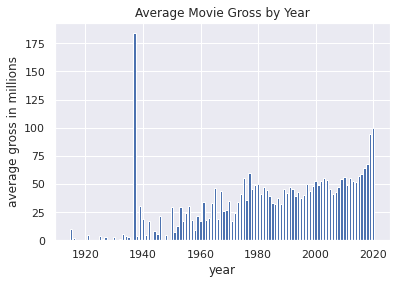

In [14]:
plot1 = movie_df.groupby('year').mean('gross (in millions)')
plt.bar(plot1.index, plot1['gross (in millions)'])
plt.xlabel('year')
plt.ylabel('average gross in millions')
plt.title('Average Movie Gross by Year')
plt.show()

The above shows the average gross of the movies realeased in each year.  The only movie in this dataset that was released in 1937 was Disney's "Snow White," and it grossed over 184 million dollars.  Since this is the only 1937 movie in this dataset that could potentially bring this year's average down, it causes the spike at 1937 above.  Therefore, I would consider it an oulier when considering trends over the years.  However, this outlier value will not be removed.  When we later look at gross values over runtime, rank, and genre, we will want this movie to be considered.

In the above visualization, we can see a general upwords trend of gross over the years.

In [15]:
movie_df['gross (in millions)'].mean()

48.68445811470961

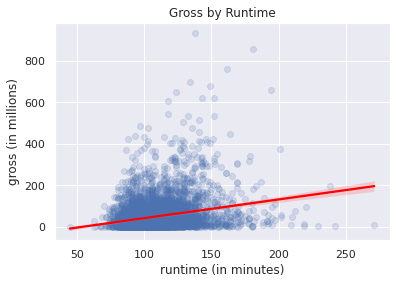

In [16]:
sns.regplot(data=movie_df, x='runtime (in minutes)', y = 'gross (in millions)',line_kws={"color": "red"},scatter_kws = {'alpha' : 1/6}).set(title ='Gross by Runtime')
plt.show()

The plot above shows the gross and runtime of each movie. We do see some clustering in the bottom portion of the plot, but this is expected since the average gross over all the movies is approximately 49 million USD.  Based on this plot, there are no relationships that can be seen between the runtime of a movie and its gross value.  

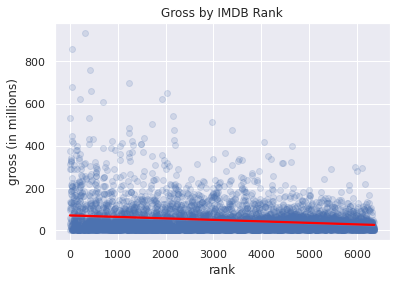

In [17]:
#sns.scatterplot(data=movie_df, x='rank', y = 'gross (in millions)', alpha=0.3).set(title ='Gross by IMDB Rank')
sns.regplot(data=movie_df, x='rank', y = 'gross (in millions)',line_kws={"color": "red"},scatter_kws = {'alpha' : 1/6}).set(title ='Gross by IMDB Rank')
plt.show()

The above shows the relationship between a movie's gross and its rank on IMDB.  While the highest grossing movies were ranked towards the top, there is seemingly no correlation in the overall dataset when it comes to these two variables.  

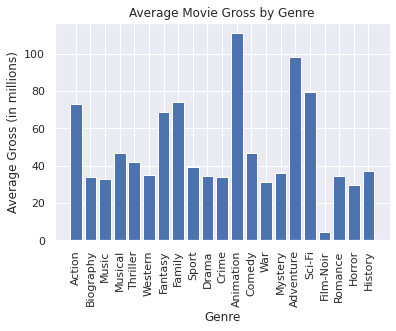

In [18]:
plot3 = pd.DataFrame(columns=['Genre','gross'])
for genre in genre_list:
    num = movie_df[genre].sum()
    temp = movie_df.loc[movie_df[genre]==1]
    profits = temp['gross (in millions)'].mean()
    plot3 = plot3.append({'Genre':genre, 'gross':profits}, ignore_index=True)


plt.bar(plot3['Genre'],plot3['gross'])
plt.xlabel('Genre')
plt.ylabel('Average Gross (in millions)')
plt.title('Average Movie Gross by Genre')
plt.xticks(rotation=90)
plt.show()
    

The above charts the average gross based on movie genre.  We can see that the animation and adventure genres have the highest grossing values, while there appears to be very little box office success when it comes to the film-noir genre.  We can also see that the majority of the movie genres had an average gross of well under the overall average ($49M). Based on this dataset, if an aspiring director wanted their best shot at a blockbuster movie, they should consider directing something in the Adventure, Action, Family, Mystery, Fantasy, or Animation genres (although, personally, I consider animation to be less of a genre and more of a medium). 

## Sources

Chen, Andy, "A Statistical Analysis of Gross Revenue in Movie Industry," http://www.ijbmer.com/docs/volumes/vol9issue3/ijbmer2018090303.pdf. 

Niu Ben, "Movie Genre and Profits: Which factors lead to a more profitable movie," https://medium.com/@ordosnb/movie-genre-and-profits-913a3142a0fb.

